##Rough


In [ ]:
K = 1  # N/m
M = 2  # kg
c = 2  # N·s/m


# Define the true displacement function
#def true_displacement(t,m,k,c):

  #d = sqrt(c**2 - m*k)
  #l1 = (-c-d)/m
  #l2= (-c+d)/m
  #print(d)
  #return (xi/(2*d))*(e**(l1*t)*(d-c)+ e**(l2*t)*(d+c))

def true_displacement(x,M,K,c):
    return (1/M) * np.exp(-c*x/(2*M)) * np.sin(np.sqrt(K/M - (c/(2*M))**2) * x)

n_sample = 1000

x_array=np.linspace(0,100,n_sample)
random.shuffle(x_array)

y_array=[]
for i in x_array:
    y_array.append(true_displacement(i,M,K,c))

#n_samples = 100
#t = np.linspace(0, 1,n_samples).reshape(100, 1)
#x = true_displacement(t,m,k,c) #+ np.random.randn(n_samples,1)*0.1

In [ ]:
#plt.scatter(x_array,y_array,s=4)
plt.plot(x_array, y_array,'b.')
#plt.plot(t, x1,'r.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
data = x_array
target = y_array

##Question 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
l = 0.2
h = 0.1
E = pow(10,7)

In [ ]:
# defining total deflection
def total_deflection (F,V,E,l,h):
  I = 1/3*h*l*l*l
  delta_x = (0.1*V*V*l*l*l*l/(8*E*I)) + (F*l*l*l/(3*E*I))
  return delta_x

In [ ]:
# generating training data
n_sample_train = 5000
F_train = np.random.uniform(low=1, high=10000, size=n_sample_train)
V_train = np.random.uniform(low=10, high=5000, size=n_sample_train)
X_train = np.empty((n_sample_train,2))
for i in range(n_sample_train):
  X_train[i][0] = F_train[i]
  X_train[i][1] = V_train[i]

y_train = total_deflection(F_train,V_train,E,l,h)
Y_train = np.empty((n_sample_train))
for i in range(n_sample_train):
  if 0.05<=y_train[i]<0.3:
    Y_train[i] = 1
  else : Y_train[i] = 0


In [ ]:
Y_train

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
X_train

array([[4055.24898997, 4133.79861255],
       [3389.2579699 , 4986.95138737],
       [3165.79819609, 3695.03587052],
       ...,
       [5980.17909302, 2275.90394372],
       [8067.26871788,   77.54776795],
       [1237.17108924, 1079.98386306]])

In [ ]:
V_train

array([ 972.13152969, 3998.92761971, 1709.33956194, ..., 3117.75235499,
       2534.00764828, 3330.43406816])

In [ ]:
F_train

array([2428.85916176, 8114.08654009, 3601.46246918, ...,   32.50787947,
       8399.41947798, 7724.97545674])

In [ ]:
y_train

array([0.03514596, 0.07710077, 0.00178445, ..., 0.02896756, 0.14782919,
       0.01490058])

In [ ]:
Y_train

array([0., 1., 0., ..., 0., 1., 0.])

In [ ]:
zeroes = 0
ones = 0
for i in range(n_sample_train):
  if Y_train[i] == 0: zeroes = zeroes+1
  else : ones = ones+1

print(zeroes,ones)

2441 2559


In [ ]:
# generating validation data
n_sample_valid = 1500
F_valid = np.random.uniform(low=1, high=9000, size=n_sample_valid)
V_valid = np.random.uniform(low=10, high=5000, size=n_sample_valid)
X_valid = np.empty((n_sample_valid,2))
for i in range(n_sample_valid):
  X_valid[i][0] = F_valid[i]
  X_valid[i][1] = V_valid[i]

y_valid = total_deflection(F_valid,V_valid,E,l,h)
Y_valid = np.empty((n_sample_valid))
for i in range(n_sample_valid):
  if 0.05<=y_valid[i]<0.3:
    Y_valid[i] = 1
  else : Y_valid[i] = 0


In [ ]:
# generating testing data
n_sample_test = 1000
F_test = np.random.uniform(low=1, high=10000, size=n_sample_test)
V_test = np.random.uniform(low=10, high=5000, size=n_sample_test)
X_test = np.empty((n_sample_test,2))
for i in range(n_sample_test):
  X_test[i][0] = F_test[i]
  X_test[i][1] = V_test[i]

y_test = total_deflection(F_test,V_test,E,l,h)
Y_test = np.empty((n_sample_test))
for i in range(n_sample_test):
  if 0.05<=y_test[i]<0.3:
    Y_test[i] = 1
  else : Y_test[i] = 0


In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])


In [ ]:
# Train the model

history = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_valid, Y_valid))


In [ ]:
# Evaluate the model on the testing data
loss, binary_accuracy = model.evaluate(X_test, Y_test)
print('Test loss:', loss)
print('Test accuracy:', binary_accuracy)

32/32 [==============================] - 0s 1ms/step - loss: 0.0343 - binary_accuracy: 0.9920
Test loss: 0.034258559346199036
Test accuracy: 0.9919999837875366


In [ ]:
X_train

array([[7079.83388333, 3036.26026819],
       [ 866.74427827, 2736.73497739],
       [6704.82963293, 2135.58864713],
       ...,
       [ 470.80334598, 3640.71044518],
       [ 553.83410688, 1071.39523907],
       [5368.38041524, 3499.53673608]])

In [ ]:
y_train

array([0.07622141, 0.05703963, 0.04091037, ..., 0.0998816 , 0.00916299,
       0.09721906])

In [ ]:
model.predict([[7079.83388333, 3036.26026819]])#,[866.74427827, 2736.73497739]])

1/1 [==============================] - 0s 63ms/step


array([[0.9982186]], dtype=float32)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer()

In [ ]:
import pickle

pickle.dump(model, open('model.pkl', 'wb')) #Saving the model
model_pkd = pickle.load(open('model.pkl', 'rb')) #To load saved model from local directory

In [ ]:
model_pkd
loss_pkd, binary_accuracy_pkd = model_pkd.evaluate(X_test, Y_test)
print('Test loss:', loss_pkd)
print('Test accuracy:', binary_accuracy_pkd)

32/32 [==============================] - 0s 979us/step - loss: 0.0343 - binary_accuracy: 0.9920
Test loss: 0.034258559346199036
Test accuracy: 0.9919999837875366


In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
model_pkd.predict(X_test)

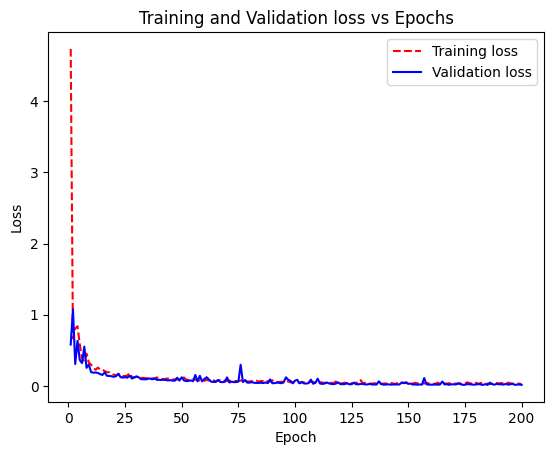

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
valid_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, valid_loss, 'b-')
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and Validation loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

32/32 [==============================] - 0s 1ms/step


<Axes: >

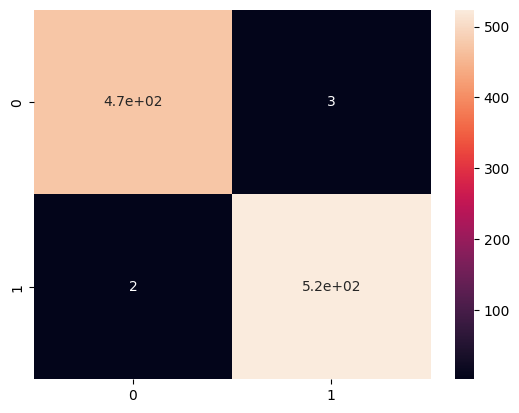

In [ ]:
# Generate confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True)


32/32 [==============================] - 0s 3ms/step


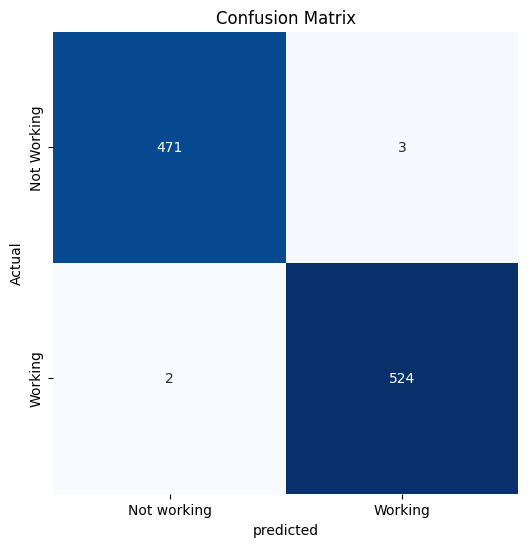

In [ ]:
y_pred = np.squeeze(model.predict(X_test)>=0.5).astype(int)
cm = confusion_matrix(Y_test, y_pred, labels=[0,1])
#clr = classification_report(Y_test, y_pred, labels=[0,1], target_names = ["Not Working", "Working"])

plt.figure(figsize = (6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin = 0, cmap = 'Blues', cbar = False)
plt.xticks(ticks = [0.5,1.5], labels=["Not working", "Working"])
plt.yticks(ticks = [0.5,1.5], labels=["Not Working", "Working"])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()
#print("Classification Report:\n------------------\n", clr)

In [ ]:
!pip install mlflow


In [ ]:
!mlflow

In [ ]:
import mlflow
import mlflow.sklearn

In [ ]:
with mlflow.start_run():
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  history = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_valid, Y_valid))

  loss, binary_accuracy = model.evaluate(X_test, Y_test)

  print('Test loss:', loss)
  print('Test accuracy:', binary_accuracy)

  #mlflow.log_param("optimizer",optimizer)
  mlflow.log_param("loss",loss)
  mlflow.log_metric("binary_accuracy",binary_accuracy)
  mlflow.sklearn.log_model(model,"model")




##Question 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [ ]:
K = 20  # N/m
M = 2  # kg
c = 2  # N·s/m

# Define the true displacement function
# function of underdamped condition taken from "https://math.libretexts.org/Bookshelves/Linear_Algebra/Book%3A_Matrix_Analysis_(Cox)/10%3A_The_Matrix_Exponential/10.06%3A_The_Mass-Spring-Damper_System"
# value of d was calculated to be 6i for given values of K,m,c. So |d| is 6.
def true_displacement(t):
    return np.exp(-c*t)*(np.cos(6*t)+c*6*np.sin(6*t))

# Generate the data for training the regression model
n_samples = 500
X = np.linspace(0, 2*np.pi, n_samples)
y = true_displacement(X) + np.random.randn(n_samples)*0.1


In [ ]:
target

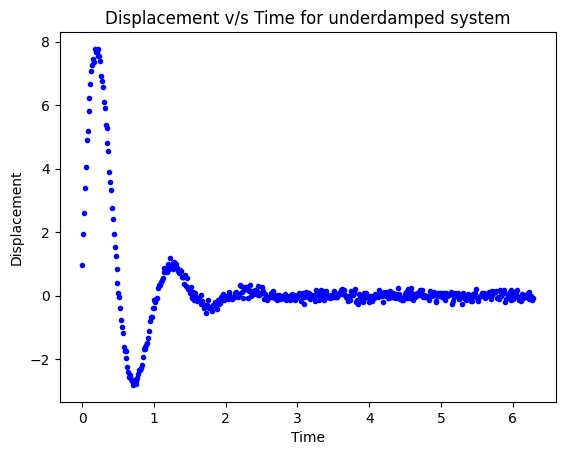

In [ ]:
plt.plot(data, target,'b.',label='Calculated Value')

#plt.plot(t, x1,'r.')
plt.title("Displacement v/s Time for underdamped system")
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.show()

In [ ]:
data = X
target = y

In [ ]:
# Standardize and Splitting Dataset
from sklearn.model_selection import train_test_split
flag=0
gate=0
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state = 0)

# standardizing using sklearn
'''
from sklearn.preprocessing import StandardScaler
mask=0
if flag!=0:
  gate=0
scaled=StandardScaler()
if gate!=0:
  mask=0
scaled.fit(X_train)
if mask!=0:
  gate=0
X_train=scaled.transform(X_train)
if gate!=0 and mask!=0:
  gate=0
  mask=0
# standardizing y
scaled_2=StandardScaler()
if gate==0 and mask!=0 and flag==0:
  gate=0
  mask=0
  flag=0
elif gate!=0 and mask==0:
  mask=0
  gate=0

scaled_2.fit(y_train)

y_train=scaled_2.transform(y_train)
if mask==0:
  while(flag!=0):
    flag=0
X_test=scaled.transform(X_test)
while(flag!=0):
  flag=0
  while(mask!=0):
    mask=0
y_test=scaled_2.transform(y_test)'''


'\nfrom sklearn.preprocessing import StandardScaler\nmask=0\nif flag!=0:\n  gate=0\nscaled=StandardScaler()\nif gate!=0:\n  mask=0\nscaled.fit(X_train)\nif mask!=0:\n  gate=0\nX_train=scaled.transform(X_train)\nif gate!=0 and mask!=0:\n  gate=0 \n  mask=0\n# standardizing y\nscaled_2=StandardScaler()\nif gate==0 and mask!=0 and flag==0:\n  gate=0\n  mask=0\n  flag=0\nelif gate!=0 and mask==0:\n  mask=0\n  gate=0\n\nscaled_2.fit(y_train)\n\ny_train=scaled_2.transform(y_train)\nif mask==0:\n  while(flag!=0):\n    flag=0\nX_test=scaled.transform(X_test)\nwhile(flag!=0):\n  flag=0\n  while(mask!=0):\n    mask=0\ny_test=scaled_2.transform(y_test)'

In [ ]:
# Define Abstract class
class Layer:
  def __init__(self):
        self.input = None
        self.output = None

# Activation Layer (ReLU)

class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    # Forward Propagation
    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))
    def forward(self, input):
        self.input = input
        return self.activation(self.input)




# Define Fully connected Layer
class FCLayer(Layer):

  def __init__(self, input_size, output_size):

        self.bias = np.random.randn(output_size, 1)
        self.weights = np.random.randn(output_size, input_size)

# Backward Propagation
  def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        temp = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return temp

  # Forward Propagation
  def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias


class Relu(ActivationLayer):
    def __init__(self):
      def relu_prime(x):
        return np.array(x >= 0).astype('int')

      def relu(x):
        return np.maximum(0,x)


      super().__init__(relu, relu_prime)

class LeakyRelu(ActivationLayer):
    def __init__(self):
      def leaky_relu_prime(x):
        return np.where(x <= 0, 0.01, 1)

      def leaky_relu(x):
        return np.where(x < 0, 0.01*x, x)


      super().__init__(leaky_relu, leaky_relu_prime)

# Define activation function and its derivative
class Sigmoid(ActivationLayer):
    def __init__(self):
      def sigmoid_prime(x):
            y = sigmoid(x)
            return y * (1 - y)

      def sigmoid(x):
            return 1 / (1 + np.exp(-x))


      super().__init__(sigmoid, sigmoid_prime)
# class for tanh activation function
class Tanh(ActivationLayer):
    def __init__(self):
        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2
        def tanh(x):
            return np.tanh(x)



        super().__init__(tanh, tanh_prime)

In [ ]:
# Define Loss function (Use mean square error)
# mean sqaured error
class MSE():
  def __init__(self):
    pass

  def loss(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

# derivative of mean squared error
  def loss_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)



In [ ]:
# Training Network
# struct
from sklearn.metrics import r2_score

Error=[]

#function to predict
def predict(network, input):
    #print(input)
    output = input
    for layer in network:
        output = layer.forward(output)
    return output
lamda=0
# main training function
def train(network, loss, x_train, y_train, epochs = 1000, learning_rate = 0.01, verbose = True, stochastic=False,batch_size=1):
    for e in range(epochs):
        Output=[]
        flag=0
        error = 0
        king=0
        grad_mean=0
        zoro=0
        count=0
        len11=len(x_train)
        idx=0
        for x, y in zip(x_train, y_train):
            # forward

            output = predict(network, x)
            while(king>0):
              if(flag>0):
                flag=0
              king=0
            if(king!=0):
              lamda=0
            Output.append(output)
            while(king>0):
              if(flag>0):
                flag=0
              king=0

            # error
            error += loss.loss(y, output)
            while(king>0):
              if(flag>0):
                flag=0
              king=0
            if(king!=0):
              lamda=0


            # backward
            grad = loss.loss_prime(y, output)
            while(king>0):
              if(flag>0):
                flag=0
              king=0
            if(king!=0):
              lamda=0
            count+=1
            while(king>0):
              if(flag>0):
                flag=0
              king=0
            grad_mean+=grad
            while(king>0):
              if(flag>0):
                flag=0
              king=0
            if(king!=0):
              lamda=0

            if stochastic==False:
              if count==batch_size or idx==len11-1:
                count=0
                grad_mean=grad_mean/batch_size
                for layer in reversed(network):
                  grad_mean = layer.backward(grad_mean,learning_rate)
              grad_mean=0


            else :
              for layer in reversed(network):
                  grad = layer.backward(grad,learning_rate)


            idx+=1
        error /= len(x_train)

        Error.append(error)

        if verbose:
            if e%50==0 :
              print(f"{e + 1}/{epochs}, error={error}")

# resizing input to fit in the model


## Make a function



In [ ]:
# X_train

In [ ]:
# def resize(X,y):
#   mask=0
#   king=0
#   zoro=0
#   print(X.shape)
#   len1,len2=X.shape

#   X_list=X

#   X_list=np.reshape(X_list,(len1,len2,1))

#   len3,len4=y.shape

#   y_list=y
#   y_list=np.reshape(y_list,(len3,len4,1))

#   return (X_list,y_list)


In [ ]:
X_train_list,y_train_list=(data,target)

In [ ]:
def plot_the_curve(index,Error,lr):
  plt.plot(indx,Error)
  plt.title('Loss with Learning rate '+str(lr))
  plt.ylabel('Loss')
  plt.xlabel('epochs')
  plt.legend(['Loss'],loc='upper left')
  plt.show()
# plot_the_curve(indx,Error,0.15)

In [ ]:
network = [
    FCLayer(1,28),
    LeakyRelu(),
    # FCLayer(32,32),
    # LeakyRelu(),
    FCLayer(28,20),
    LeakyRelu(),
    FCLayer(20,10),
    LeakyRelu(),
    FCLayer(10,5),
    LeakyRelu(),
    # FCLayer(16,32),
    # Relu(),
    FCLayer(5,1),
    # Relu(),
    # FCLayer(4,1),
    # Relu()


]
Error=[]
train(network, MSE, X_train_list, y_train_list, epochs=1000, learning_rate=0.0015,stochastic=True,batch_size=1)
indx=[]
for i in range((len(Error))):
  indx.append(i+1)


1/1000, error=0.37647645270119207
51/1000, error=0.053678909311444006
101/1000, error=0.04566051251350425
151/1000, error=0.040070357757493534
201/1000, error=0.03435986475481521
251/1000, error=0.03304393393842137
301/1000, error=0.02618833755336039
351/1000, error=0.024172431026699706
401/1000, error=0.022698372248371908
451/1000, error=0.022233957898549005
501/1000, error=0.021919249367746495
551/1000, error=0.022291414208343664
601/1000, error=0.021254330091265535
651/1000, error=0.021857066078806338
701/1000, error=0.021613735979376093
751/1000, error=0.02114539628591745
801/1000, error=0.02083253991263813
851/1000, error=0.02053573449724367
901/1000, error=0.0200173217102308
951/1000, error=0.020353419244156963


In [ ]:
print(Error)


[0.37647645270119207, 0.9193635016437979, 0.47043918221333075, 0.1264659265319787, 0.06091683142907535, 0.05595233547787075, 0.05711506449879591, 0.05670525317645104, 0.08349394889789395, 0.06860114915162924, 0.07960324447580852, 0.08994027672700652, 0.10310586428718184, 0.10995635942074865, 0.13715121004384795, 0.11531526240718637, 0.16867129387273125, 0.15648826828355572, 0.08869637653576128, 0.105599346898038, 0.09965064505144205, 0.09901006754182325, 0.0955487538401971, 0.09323121831764272, 0.09237978676081904, 0.08459229343497952, 0.08914137250560192, 0.08852144056099322, 0.08232904379057857, 0.07932822010537388, 0.07680151872559728, 0.07550232191893098, 0.0722866966701207, 0.07008637188472311, 0.06874857591723514, 0.0656669822595434, 0.06547931205046549, 0.06478026625336597, 0.05980353661176114, 0.05774278319332648, 0.05466172098790754, 0.05239022531186471, 0.05546697831805149, 0.05909008451711008, 0.05063294403565217, 0.05183804378342722, 0.04941981250519307, 0.05363201734073611

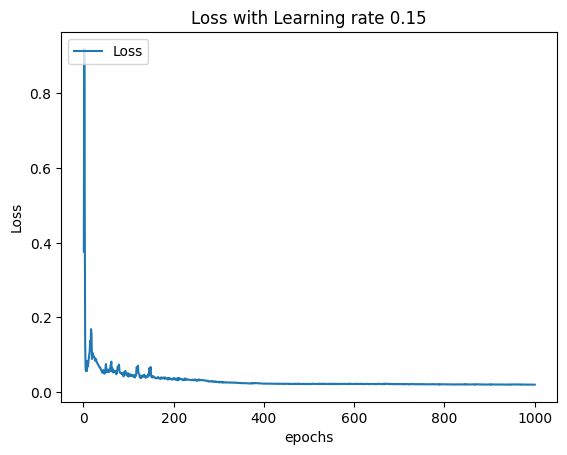

In [ ]:
plot_the_curve(indx,Error,0.15)

In [ ]:
ycord=[]
for x, y in zip(X_train_list, y_train_list):
            # forward

            output_khare = predict(network, x)
            # print(type(output_khare))
            ycord.append(output_khare[0])


In [ ]:
ap=[]
for i in range(len(ycord)):
  ap.append(ycord[i][0])

In [ ]:
type(ap)

list

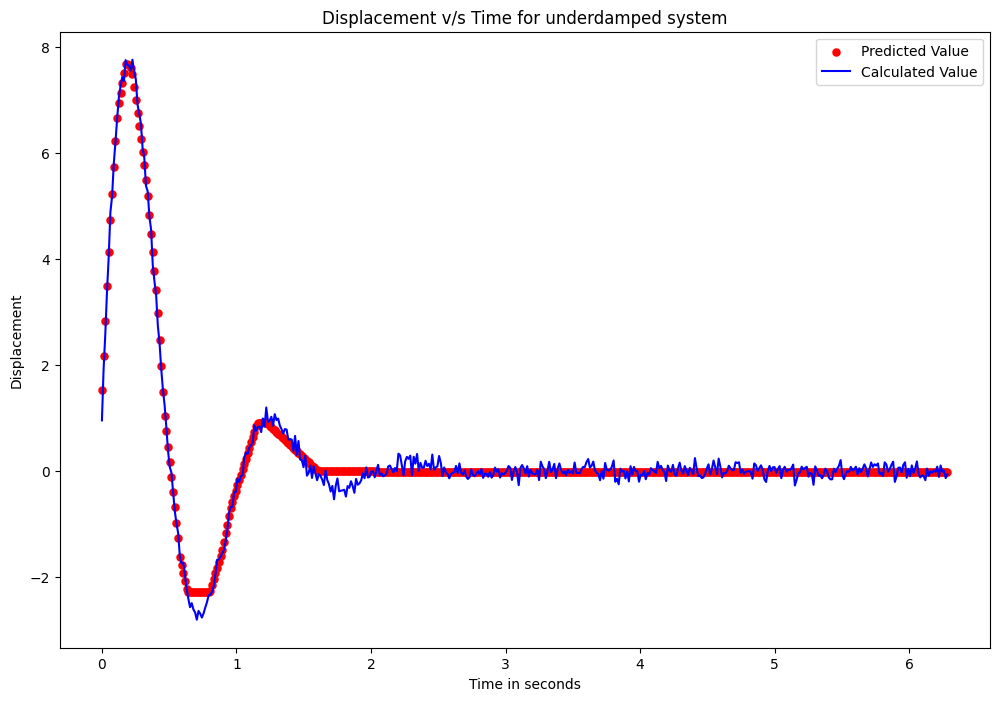

In [ ]:
plt.figure(figsize=(12, 8))
# plt.scatter(tdata,xobs, label='Measured Value')
plt.scatter(X_train_list,ap,linewidth=0.1,color='red',label='Predicted Value')
plt.plot(data,target,linewidth=1.5,color='blue',label='Calculated Value')
plt.legend()

plt.title("Displacement v/s Time for underdamped system")
plt.xlabel("Time in seconds")
plt.ylabel("Displacement")
plt.show()

###with polynomial regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.pipeline import Pipeline

import random

In [ ]:
K = 20  # N/m
M = 2  # kg
c = 2  # N·s/m

# Define the true displacement function
# function of underdamped condition taken from "https://math.libretexts.org/Bookshelves/Linear_Algebra/Book%3A_Matrix_Analysis_(Cox)/10%3A_The_Matrix_Exponential/10.06%3A_The_Mass-Spring-Damper_System"
# value of d was calculated to be 6i for given values of K,m,c. So |d| is 6.
def true_displacement(t):
    return np.exp(-c*t)*(np.cos(6*t)+c*6*np.sin(6*t))

n_samples = 100
X = np.linspace(0, 5,n_samples).reshape(100, 1)
y = true_displacement(X) #+ np.random.randn(n_samples,1)*0.5


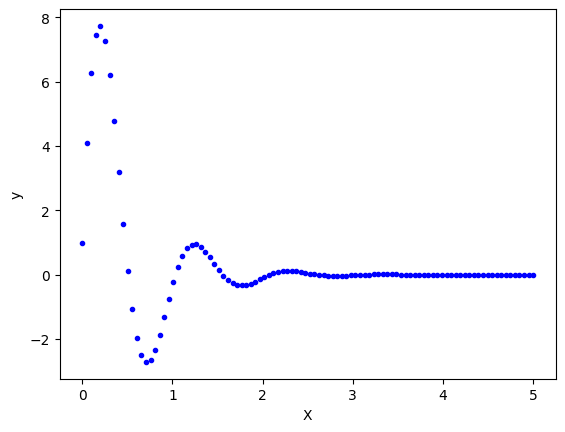

In [ ]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
poly = PolynomialFeatures(degree=15)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [ ]:
def polynomial_regression(degree):
    X_new=np.linspace(-1, 5, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)

    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),

            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([0, 5, -5, 10])
    plt.show()

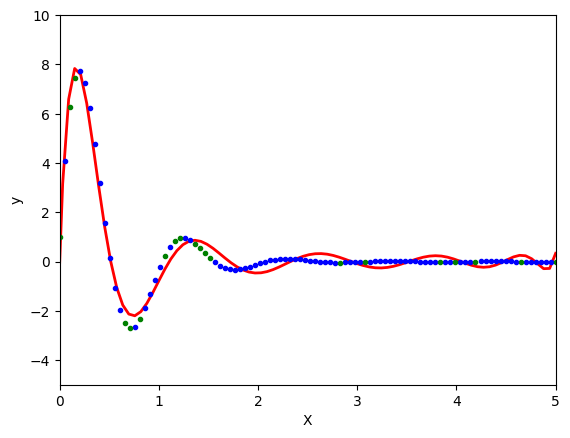

In [ ]:
polynomial_regression(12)